In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
df_proj_ccf = pd.read_csv('dataframe_data/proj_ccf-me_test_copy.csv', dtype={0: str})
df_meta = pd.read_csv('dataframe_data/meta_data.csv', dtype={0: str}).dropna()
region = 'MB_'
df_meta_filtered = df_meta[df_meta['Soma_region'].str.startswith('{}'.format(region))]
#df_meta_filtered = df_meta[df_meta['Soma_region'].str.startswith('GNG') | df_meta['Soma_region'].str.startswith('SAD')]
#    df_meta['Soma_region'].str.startswith('ME') |
#    df_meta['Soma_region'].str.startswith('MB_CA') |
#    df_meta['Soma_region'].str.startswith('MB_VL') |
#    df_meta['Soma_region'].str.startswith('FLA')
#]
df_feature = pd.read_csv('dataframe_data/mefeatures_130K.csv', dtype={'Name': str}).dropna()
merged_df1 = pd.merge(df_meta_filtered, df_proj_ccf, on='Name', how='left').dropna()
merged_df2 = pd.merge(merged_df1, df_feature, on='Name', how='left').dropna()
#merged_df2['Soma_region'] = merged_df2['Soma_region'].str.replace(r'(_L|_R)$', '', regex=True)
merged_df2['position'] = merged_df2['Soma_region'].apply(lambda x: 'left' if x.endswith('_L') else 'right')
merged_df2

,Name,soma_x_x,soma_y_x,soma_z_x,branches_count,type,radius,Soma_region,projected_x,projected_y,...,pca_vr2_me,pca_vr3_me,soma_x_y,soma_y_y,soma_z_y,soma_x_ori,soma_y_ori,soma_z_ori,region_id,position
0,720575940634107292,440.42038,116.165945,204.719420,1,Unipolar,2.025,MB_CA_L,440.174344,120.268785,...,0.069597,0.011418,440.174344,120.268785,201.720130,440420.0,116166.0,204719.0,81,left
1,720575940607698627,382.03147,155.645030,216.533940,1,Unipolar,2.115,MB_CA_L,404.320564,143.489111,...,0.102768,0.039857,404.320564,143.489111,206.581708,382031.0,155645.0,216534.0,81,left
2,720575940639127861,435.08840,172.952750,222.049950,1,Unipolar,2.024,MB_CA_L,434.496813,164.819352,...,0.060611,0.009931,434.496813,164.819352,212.452205,435088.0,172953.0,222050.0,81,left
3,720575940615975227,574.38875,110.720375,156.554160,1,Unipolar,1.944,MB_CA_R,593.203784,134.531930,...,0.139932,0.069846,593.203784,134.531930,164.999560,574389.0,110720.0,156554.0,36,right
4,720575940624266936,466.96812,160.112950,213.226840,1,Unipolar,1.910,MB_CA_L,457.120520,154.022258,...,0.160551,0.056521,457.120520,154.022258,205.972644,466968.0,160113.0,213227.0,81,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,720575940625185613,501.09260,138.198140,34.267273,1,Unipolar,2.226,MB_ML_L,506.683084,157.837104,...,0.133071,0.055618,506.683084,157.837104,42.145647,501093.0,138198.0,34267.3,66,left
5027,720575940605350066,593.51510,117.695750,161.589340,1,Unipolar,2.135,MB_CA_R,600.403760,128.308552,...,0.157711,0.088280,600.403760,128.308552,167.777999,593515.0,117696.0,161589.0,36,right
5028,720575940637934308,625.66894,191.294330,37.982363,1,Unipolar,3.321,MB_ML_R,617.601532,183.401038,...,0.159894,0.077147,617.601532,183.401038,39.162052,625669.0,191294.0,37982.4,19,right
5029,720575940622269365,408.66950,171.811730,218.598340,1,Unipolar,2.008,MB_CA_L,413.344644,158.379524,...,0.129892,0.034406,413.344644,158.379524,209.990280,408670.0,171812.0,218598.0,81,left


In [3]:
me_feature_column = [
    'Name', 'Soma_region',
    'Stems_me', 'Bifurcations_me', 'Branches_me', 'Tips_me', 
    'OverallWidth_me', 'OverallHeight_me', 'OverallDepth_me', 
    'Length_me', 'Volume_me', 'MaxEuclideanDistance_me', 
    'MaxPathDistance_me', 'MaxBranchOrder_me', 'AverageContraction_me', 
    'AverageFragmentation_me', 'AverageParent-daughterRatio_me', 
    'AverageBifurcationAngleLocal_me', 'AverageBifurcationAngleRemote_me', 
    'HausdorffDimension_me', 'pc11_me', 'pc12_me', 'pc13_me', 
    'pca_vr1_me', 'pca_vr2_me', 'pca_vr3_me'
]
single_feature_column = [
    'Name', 'Soma_region',
    'Stems', 'Bifurcations', 'Branches', 'Tips', 
    'OverallWidth', 'OverallHeight', 'OverallDepth', 
    'Length', 'Volume', 'MaxEuclideanDistance', 
    'MaxPathDistance', 'MaxBranchOrder', 'AverageContraction', 
    'AverageFragmentation', 'AverageParent-daughterRatio', 
    'AverageBifurcationAngleLocal', 'AverageBifurcationAngleRemote', 
    'HausdorffDimension', 'pc11', 'pc12', 'pc13', 
    'pca_vr1', 'pca_vr2', 'pca_vr3'
]
numeric_columns = ["Name", 'Soma_region','position'] + [col for col in merged_df2.columns if re.match(r'^\d+$', str(col))]
df_mefeature = merged_df2[me_feature_column]
df_single = merged_df2[single_feature_column]
df_proj = merged_df2[numeric_columns]
df_proj

,Name,Soma_region,position,1,2,3,4,5,6,7,...,473,474,475,476,477,478,479,480,481,482
0,720575940634107292,MB_CA_L,left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,720575940607698627,MB_CA_L,left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,720575940639127861,MB_CA_L,left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,720575940615975227,MB_CA_R,right,0.0,0.0,10000.0,30000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,720575940624266936,MB_CA_L,left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,720575940625185613,MB_ML_L,left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5027,720575940605350066,MB_CA_R,right,0.0,0.0,0.0,29000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5028,720575940637934308,MB_ML_R,right,0.0,0.0,97000.0,7000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5029,720575940622269365,MB_CA_L,left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_mefeature

,Name,Soma_region,Stems_me,Bifurcations_me,Branches_me,Tips_me,OverallWidth_me,OverallHeight_me,OverallDepth_me,Length_me,...,AverageParent-daughterRatio_me,AverageBifurcationAngleLocal_me,AverageBifurcationAngleRemote_me,HausdorffDimension_me,pc11_me,pc12_me,pc13_me,pca_vr1_me,pca_vr2_me,pca_vr3_me
0,720575940634107292,MB_CA_L,1.0,134.4970,280.241,145.8850,86210.5,70660.6,184172.0,718661.0,...,0.616840,112.011,97.7887,1.30834,-0.191698,-0.180368,0.963500,0.918985,0.069597,0.011418
1,720575940607698627,MB_CA_L,1.0,112.5260,229.510,117.1170,128885.0,80990.4,167619.0,760971.0,...,0.606175,115.175,99.3808,1.43293,-0.381841,0.037507,0.900335,0.857374,0.102768,0.039857
2,720575940639127861,MB_CA_L,1.0,158.6220,329.448,170.9780,92362.1,44067.6,190046.0,703725.0,...,0.603852,117.311,103.6680,1.40192,-0.263946,-0.082831,0.959936,0.929458,0.060611,0.009931
3,720575940615975227,MB_CA_R,1.0,95.7570,195.821,100.3350,93788.0,79368.9,144775.0,707762.0,...,0.608309,116.913,98.4808,1.32334,0.232329,-0.221329,0.946156,0.790222,0.139932,0.069846
4,720575940624266936,MB_CA_L,1.0,144.6740,299.608,155.3610,76556.3,106836.0,160558.0,806120.0,...,0.617258,116.686,101.9800,1.44143,-0.084885,-0.019183,0.995733,0.782928,0.160551,0.056521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,720575940625185613,MB_ML_L,1.0,248.4560,509.935,261.4790,124699.0,80687.7,89788.4,1157490.0,...,0.593715,116.324,102.1460,1.36365,0.600199,0.306321,-0.024421,0.811310,0.133071,0.055618
5027,720575940605350066,MB_CA_R,1.0,82.1933,167.982,85.7887,90034.5,86984.9,147956.0,739053.0,...,0.615295,122.269,104.5750,1.42176,0.272408,-0.161286,0.944815,0.754008,0.157711,0.088280
5028,720575940637934308,MB_ML_R,1.0,2334.7900,4858.970,2524.1800,163831.0,81533.3,83963.7,6846300.0,...,0.630286,118.714,105.6070,1.87081,0.970416,0.112479,-0.106914,0.762959,0.159894,0.077147
5029,720575940622269365,MB_CA_L,1.0,116.4420,239.369,122.9270,103244.0,108145.0,168273.0,659660.0,...,0.621170,117.169,100.4390,1.39667,-0.313486,-0.023739,0.948694,0.835702,0.129892,0.034406


## plot

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\path\anaconda\envs\brain\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\ylx\AppData\Local\Temp\ipykernel_22464\3774574575.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20',num_regions)  # 使用 'tab20' 颜色映射


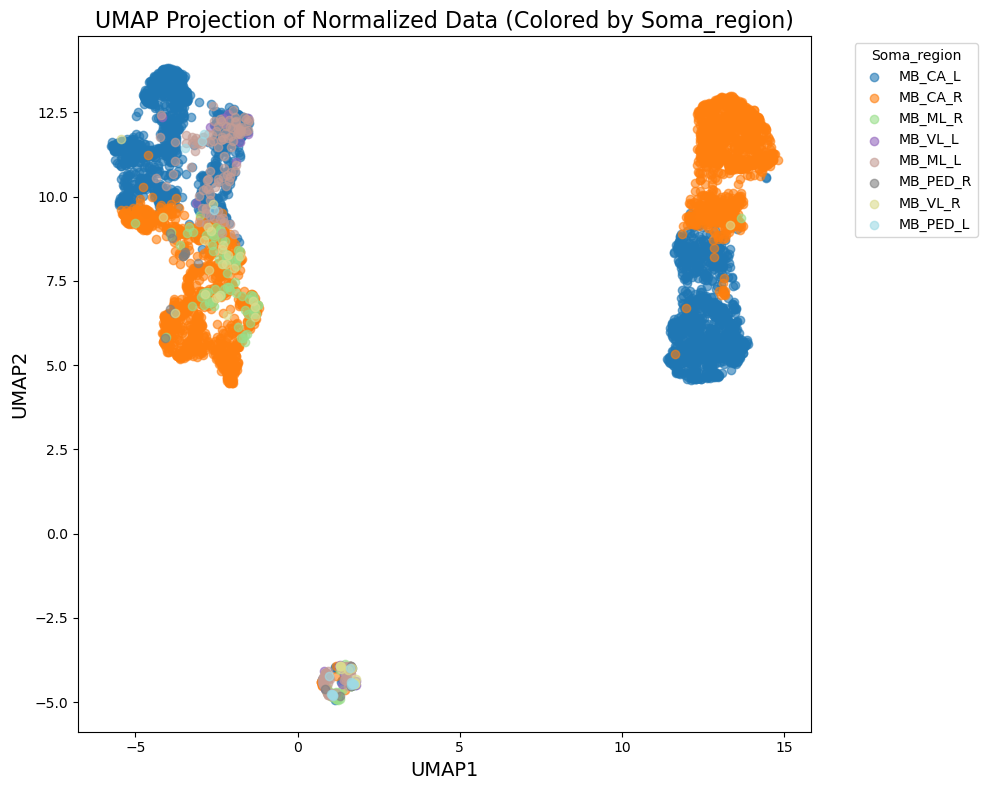

In [5]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data_to_umap = df_single.drop(columns=['Name', 'Soma_region'])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_umap)

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=25)  

umap_result = umap_model.fit_transform(data_normalized)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

umap_df['Soma_region'] = df_proj['Soma_region'].values

unique_regions = umap_df['Soma_region'].unique()
num_regions = len(unique_regions)
color_map = plt.cm.get_cmap('tab20',num_regions)  


plt.figure(figsize=(10, 8))  

for i, region in enumerate(unique_regions):
    region_data = umap_df[umap_df['Soma_region'] == region]
    plt.scatter(region_data['UMAP1'], region_data['UMAP2'], 
                color=color_map(i), label=region, alpha=0.6)

plt.title('UMAP Projection of Normalized Data (Colored by Soma_region)', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)

plt.legend(title='Soma_region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\path\anaconda\envs\brain\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\ylx\AppData\Local\Temp\ipykernel_22464\481200053.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20',num_regions)  # 使用 'tab20' 颜色映射


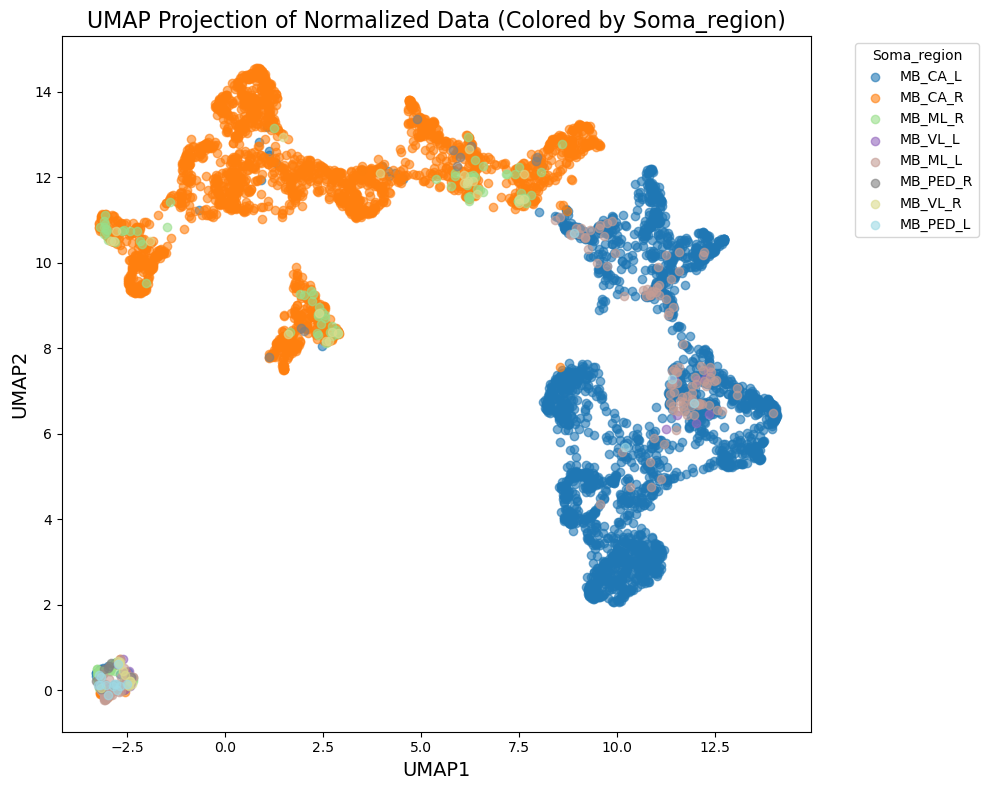

In [6]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data_to_umap = df_mefeature.drop(columns=['Name', 'Soma_region'])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_umap)

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=25)  

umap_result = umap_model.fit_transform(data_normalized)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

umap_df['Soma_region'] = df_proj['Soma_region'].values

unique_regions = umap_df['Soma_region'].unique()
num_regions = len(unique_regions)
color_map = plt.cm.get_cmap('tab20',num_regions) 

plt.figure(figsize=(10, 8)) 

for i, region in enumerate(unique_regions):
    region_data = umap_df[umap_df['Soma_region'] == region]
    plt.scatter(region_data['UMAP1'], region_data['UMAP2'], 
                color=color_map(i), label=region, alpha=0.6)

plt.title('UMAP Projection of Normalized Data (Colored by Soma_region)', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)

plt.legend(title='Soma_region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\path\anaconda\envs\brain\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\ylx\AppData\Local\Temp\ipykernel_22464\2089511155.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20',num_regions)  # 使用 'tab20' 颜色映射


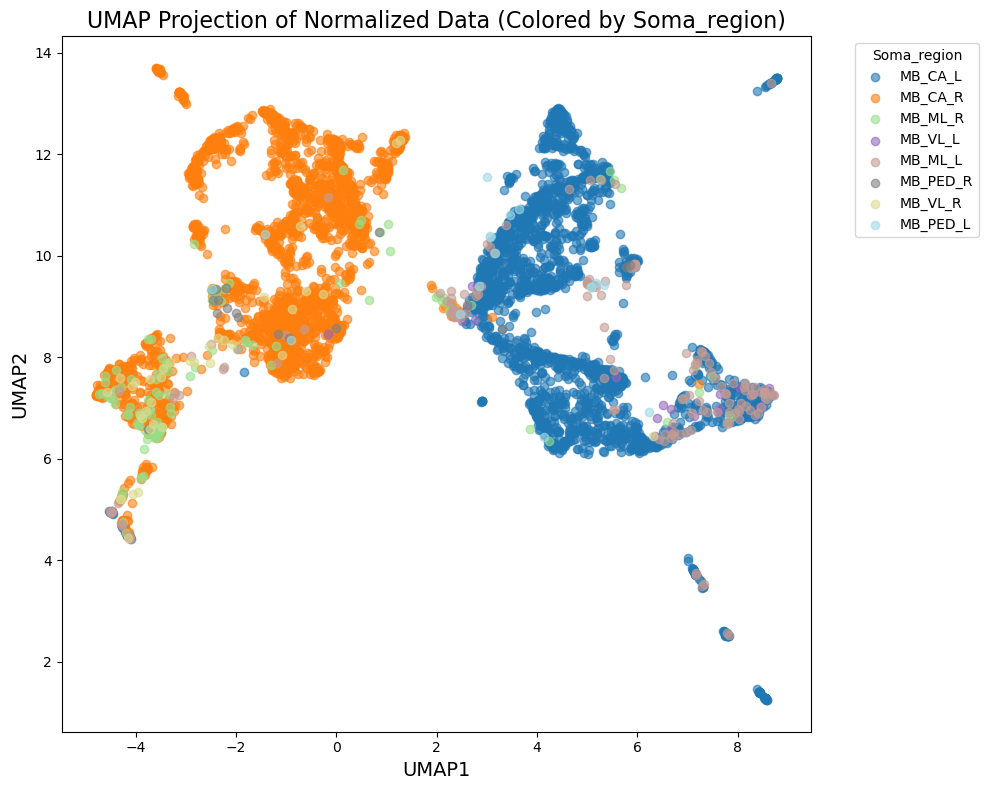

In [7]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data_to_umap = df_proj.drop(columns=['Name', 'Soma_region', 'position'])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_umap)

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=150)  

umap_result = umap_model.fit_transform(data_normalized)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

umap_df['Soma_region'] = df_proj['Soma_region'].values

unique_regions = umap_df['Soma_region'].unique()
num_regions = len(unique_regions)
color_map = plt.cm.get_cmap('tab20',num_regions)  

plt.figure(figsize=(10, 8))  

for i, region in enumerate(unique_regions):
    region_data = umap_df[umap_df['Soma_region'] == region]
    plt.scatter(region_data['UMAP1'], region_data['UMAP2'], 
                color=color_map(i), label=region, alpha=0.6)

plt.title('UMAP Projection of Normalized Data (Colored by Soma_region)', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)

plt.legend(title='Soma_region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## save_csv

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\path\anaconda\envs\brain\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


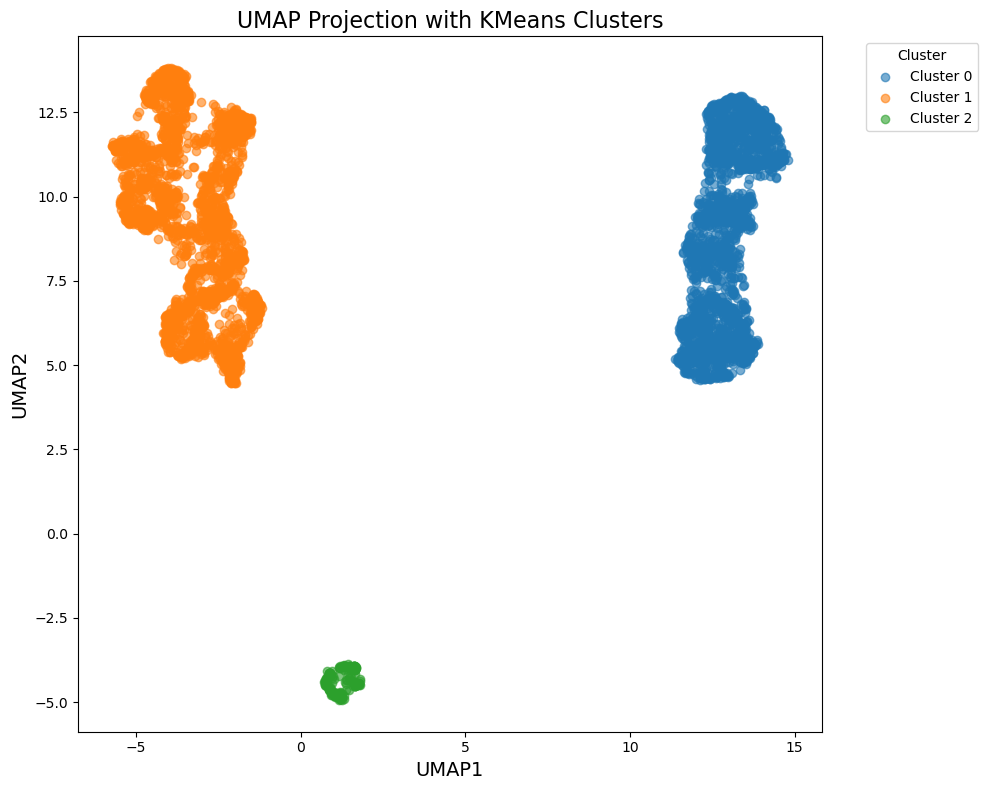

In [44]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_to_umap = df_single.drop(columns=['Name', 'Soma_region'])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_umap)

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=25)

umap_result = umap_model.fit_transform(data_normalized)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

umap_df['Soma_region'] = df_single['Soma_region'].values
umap_df['Name'] = df_single['Name'].values

kmeans = KMeans(n_clusters=3, random_state=45,tol=1e-6,max_iter=600)
umap_df['Cluster'] = kmeans.fit_predict(umap_df[['UMAP1', 'UMAP2']])

plt.figure(figsize=(10, 8))  

for i in range(3):  
    cluster_data = umap_df[umap_df['Cluster'] == i]
    plt.scatter(cluster_data['UMAP1'], cluster_data['UMAP2'], label=f'Cluster {i}', alpha=0.6)

plt.title('UMAP Projection with KMeans Clusters', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

output_df = umap_df[['Name', 'Soma_region', 'UMAP1', 'UMAP2', 'Cluster']]
output_df.to_csv('H:\\manuscript\\figure3\\umap_MB\\umap_cluster_single.csv'.format(region), index=False)

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\path\anaconda\envs\brain\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


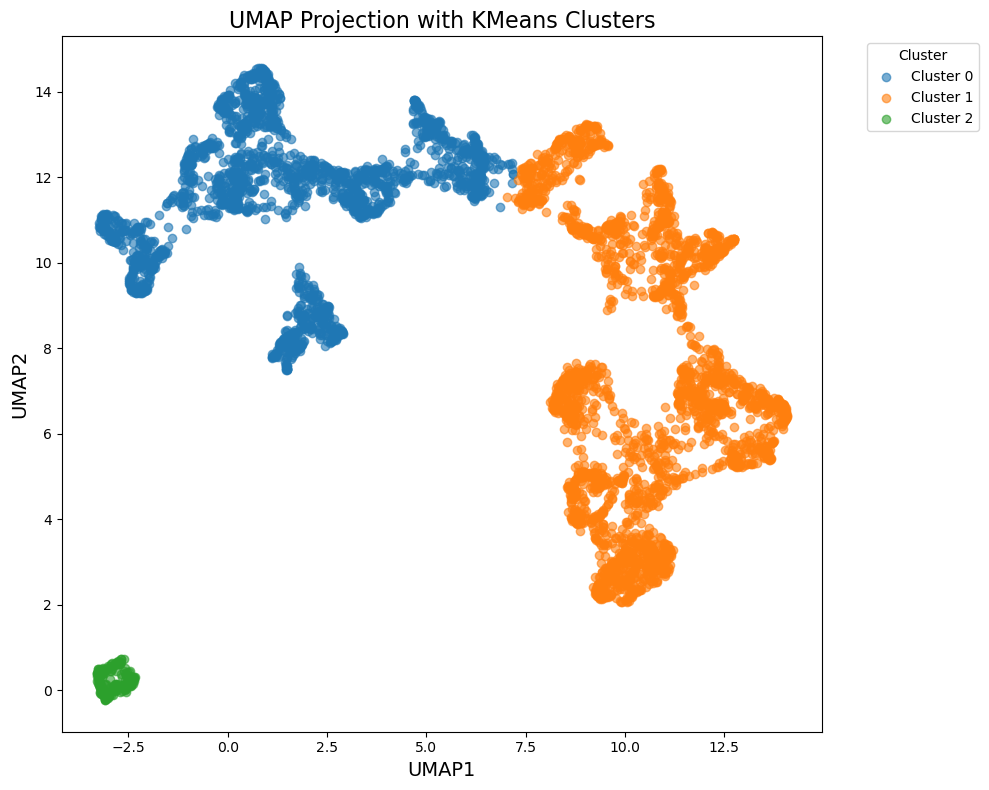

In [45]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_to_umap = df_mefeature.drop(columns=['Name', 'Soma_region'])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_umap)

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=25)

umap_result = umap_model.fit_transform(data_normalized)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

umap_df['Soma_region'] = df_single['Soma_region'].values
umap_df['Name'] = df_single['Name'].values

kmeans = KMeans(n_clusters=3, random_state=45,tol=1e-6,max_iter=600)
umap_df['Cluster'] = kmeans.fit_predict(umap_df[['UMAP1', 'UMAP2']])

plt.figure(figsize=(10, 8))  

for i in range(3): 
    cluster_data = umap_df[umap_df['Cluster'] == i]
    plt.scatter(cluster_data['UMAP1'], cluster_data['UMAP2'], label=f'Cluster {i}', alpha=0.6)

plt.title('UMAP Projection with KMeans Clusters', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

output_df = umap_df[['Name', 'Soma_region', 'UMAP1', 'UMAP2', 'Cluster']]
output_df.to_csv('H:\\manuscript\\figure3\\umap_MB\\umap_cluster_mefeature.csv'.format(region), index=False)

D:\path\anaconda\envs\brain\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\path\anaconda\envs\brain\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


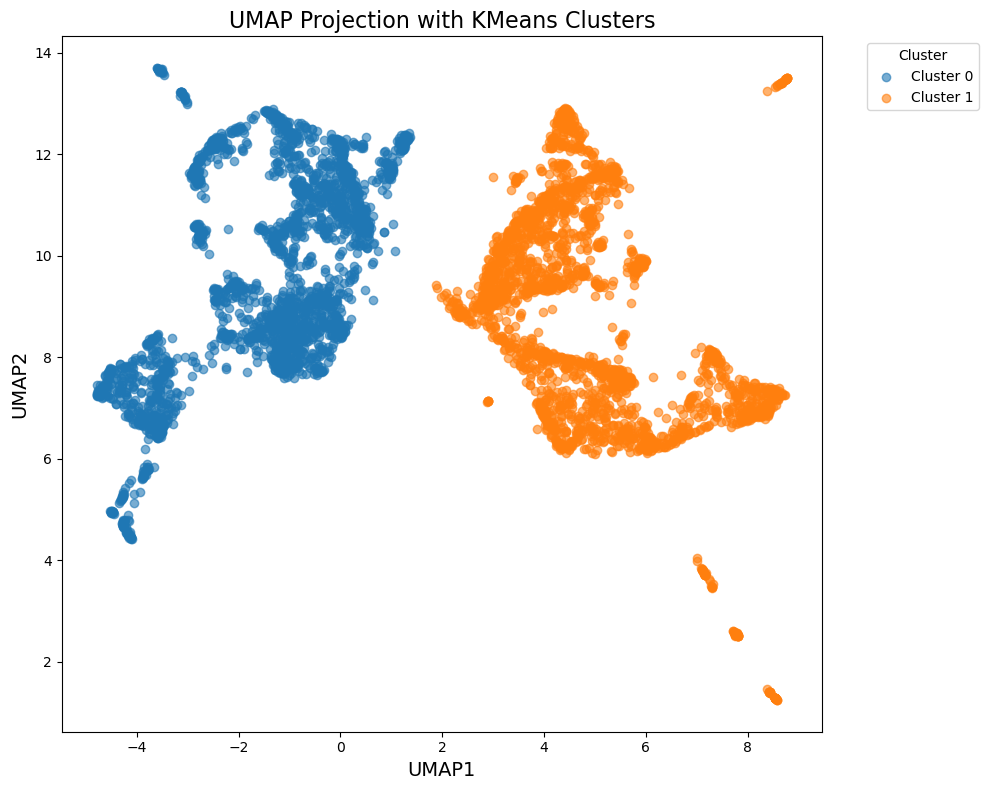

In [46]:
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data_to_umap = df_proj.drop(columns=['Name', 'Soma_region','position'])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_umap)

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=150)

umap_result = umap_model.fit_transform(data_normalized)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

umap_df['position'] = df_proj['position'].values
umap_df['Soma_region'] = df_proj['Soma_region'].values
umap_df['Name'] = df_proj['Name'].values

kmeans = KMeans(n_clusters=2, random_state=45,tol=1e-6,max_iter=600)
umap_df['Cluster'] = kmeans.fit_predict(umap_df[['UMAP1', 'UMAP2']])

plt.figure(figsize=(10, 8))  

for i in range(2):  
    cluster_data = umap_df[umap_df['Cluster'] == i]
    plt.scatter(cluster_data['UMAP1'], cluster_data['UMAP2'], label=f'Cluster {i}', alpha=0.6)

plt.title('UMAP Projection with KMeans Clusters', fontsize=16)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)

plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

output_df = umap_df[['Name', 'Soma_region', 'UMAP1', 'UMAP2', 'Cluster', 'position']]
output_df.to_csv('H:\\manuscript\\figure3\\umap_MB\\umap_cluster_proj.csv'.format(region), index=False)